In [72]:
import requests
import json
import pandas as pd
import numpy as np

## Load data

In [ ]:
json_data = """
{
  "reports": [
    {
      "columnHeader":
      {
        "dimensions": ["ga:date"],
        "metricHeader": {
          "metricHeaderEntries": [
            {"name": "ga:sessions"},
            {"name": "ga:pageviews"},
            {"name": "ga:users"}
          ]
        }
      },
      "data": {
        "rows": [
          {
            "dimensions": ["20230101"],
            "metrics": [{"values": ["1000", "3000", "900"]}]
          },
          {
            "dimensions": ["20230102"],
            "metrics": [{"values": ["950", "2800", "850"]}]
          },
          {
            "dimensions": ["20230103"],
            "metrics": [{"values": ["970", "2900", "870"]}]
          },
          {
            "dimensions": ["20230104"],
            "metrics": [{"values": ["", "3100", "890"]}]
          }
        ]
      }
    }
  ]
}
"""
data = json.loads(json_data)
data

{'reports': [{'columnHeader': {'dimensions': ['ga:date'],
    'metricHeader': {'metricHeaderEntries': [{'name': 'ga:sessions'},
      {'name': 'ga:pageviews'},
      {'name': 'ga:users'}]}},
   'data': {'rows': [{'dimensions': ['20230101'],
      'metrics': [{'values': ['1000', '3000', '900']}]},
     {'dimensions': ['20230102'],
      'metrics': [{'values': ['950', '2800', '850']}]},
     {'dimensions': ['20230103'],
      'metrics': [{'values': ['970', '2900', '870']}]},
     {'dimensions': ['20230104'],
      'metrics': [{'values': ['', '3100', '890']}]}]}}]}

In [73]:
dimensions_column_name = data['reports'][0]['columnHeader']['dimensions']
metrics_column_names_dict = data['reports'][0]['columnHeader']['metricHeader']['metricHeaderEntries']
metrics_column_names = [entry['name'] for entry in metrics_column_names_dict]
metrics_column_names

column_names = dimensions_column_name + metrics_column_names
column_names

['ga:date', 'ga:sessions', 'ga:pageviews', 'ga:users']

In [74]:
data_rows = data['reports'][0]['data']['rows']
# [
#     {
#         "dimensions": ["20230101"],
#         "metrics": [{"values": ["1000", "3000", "900"]}]
#     },
#     {
#         "dimensions": ["20230102"],
#         "metrics": [{"values": ["950", "2800", "850"]}]
#     },
# ]
rows = [
    d['dimensions'] + d['metrics'][0]['values']
    for d in data_rows
]
rows


[['20230101', '1000', '3000', '900'],
 ['20230102', '950', '2800', '850'],
 ['20230103', '970', '2900', '870'],
 ['20230104', '', '3100', '890']]

In [75]:
df = pd.DataFrame(data=rows, columns=column_names)
df

,ga:date,ga:sessions,ga:pageviews,ga:users
0,20230101,1000,3000,900
1,20230102,950,2800,850
2,20230103,970,2900,870
3,20230104,,3100,890


## Merge DFs


In [76]:
# df['date'] = pd.to_datetime(df['ga:date'])
# df.drop(columns='ga:date', inplace=True, errors='ignore')
df.rename( lambda cn:cn.replace('ga:',''), axis=1, inplace=True)
df


,date,sessions,pageviews,users
0,20230101,1000,3000,900
1,20230102,950,2800,850
2,20230103,970,2900,870
3,20230104,,3100,890


In [77]:
test = 'ga:sessions'
test.replace('ga:', '')

'sessions'

## Data Cleaning

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       4 non-null      object
 1   sessions   4 non-null      object
 2   pageviews  4 non-null      object
 3   users      4 non-null      object
dtypes: object(4)
memory usage: 260.0+ bytes


In [79]:
# df[['sessions', 'pageviews']] = df[]

# df['sessions'] = pd.to_numeric(df['sessions'], downcast='integer')
df = df.apply( pd.to_numeric, axis=1, errors="raise")
df
# pd.to_numeric(df['sessions'])


,date,sessions,pageviews,users
0,20230101.0,1000.0,3000.0,900.0
1,20230102.0,950.0,2800.0,850.0
2,20230103.0,970.0,2900.0,870.0
3,20230104.0,NaN,3100.0,890.0


## Plot data


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>], dtype=object)

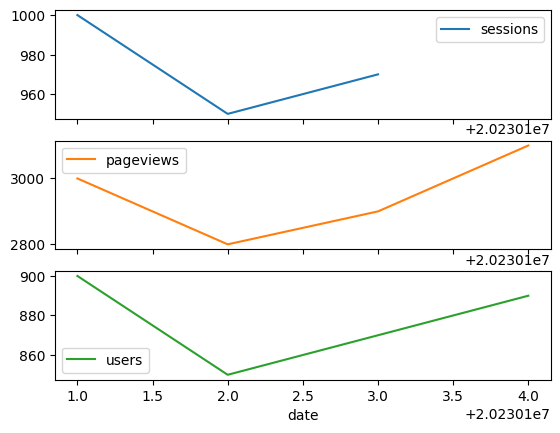

In [80]:
# plot line chart:
df.plot(x='date', y=['sessions', 'pageviews','users'], subplots=True)